# Techniques for the Assignment 2/2

JD Sports and Frasers Group as used as exmaples in this session.

## Download the required data

You need to download the daily prices from 02/03/2020 to 28/02/2022. Then set the last 20 days as the test set and the first 485 days (for this example, yours may vary) as the training set.

In [421]:
# import required libraries or commands within a library

In [423]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [424]:
import pandas as pd
import yfinance as yf
import numpy as np

In [427]:

import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
#from sklearn.metrics import mean_absolute_percentage_error as MAPE
import statsmodels.api as sa
import statsmodels.formula.api as sfa
from statsmodels.tsa.api import ExponentialSmoothing as TES 
from statsmodels.tsa.api import SimpleExpSmoothing as SES
from statsmodels.tsa.api import Holt as DES

In [429]:
# Download JD Sports prices
Smurfit=yf.download('SKG.L',start='2020-03-02',end='2022-03-01')
Mondi=yf.download('MNDI.L',start='2020-03-02',end='2022-03-01')
FTSE=yf.download('^FTSE',start='2020-03-02',end='2022-03-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [431]:
Smurfit

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,SKG.L,SKG.L,SKG.L,SKG.L,SKG.L,SKG.L
Date,,,,,,
2020-03-02 00:00:00+00:00,2123.818604,2606.0,2680.350098,2554.0,2570.0,799991
2020-03-03 00:00:00+00:00,2187.386719,2684.0,2754.000000,2618.0,2638.0,590415
2020-03-04 00:00:00+00:00,2228.135254,2734.0,2772.000000,2678.0,2698.0,644906
2020-03-05 00:00:00+00:00,2179.236572,2674.0,2768.000000,2648.0,2744.0,1707831
2020-03-06 00:00:00+00:00,2074.920166,2546.0,2634.000000,2546.0,2618.0,545292
...,...,...,...,...,...,...
2022-02-22 00:00:00+00:00,3436.668945,3932.0,3994.000000,3877.0,3887.0,399580
2022-02-23 00:00:00+00:00,3443.661377,3940.0,3993.000000,3910.0,3972.0,300901


In [433]:
Mondi

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,MNDI.L,MNDI.L,MNDI.L,MNDI.L,MNDI.L,MNDI.L
Date,,,,,,
2020-03-02 00:00:00+00:00,1260.914307,1729.199951,1769.349854,1682.851440,1747.899902,3093748
2020-03-03 00:00:00+00:00,1292.196655,1772.099854,1813.349854,1746.799927,1757.799927,2437046
2020-03-04 00:00:00+00:00,1331.098877,1825.449951,1826.549927,1774.849854,1781.999878,2239004
2020-03-05 00:00:00+00:00,1305.832397,1790.799927,1846.349854,1782.549927,1846.349854,3084053
2020-03-06 00:00:00+00:00,1276.154419,1750.099854,1775.949951,1733.049927,1746.799927,3459732
...,...,...,...,...,...,...
2022-02-22 00:00:00+00:00,1675.551147,2088.349854,2112.000000,2037.199951,2043.799927,1739056
2022-02-23 00:00:00+00:00,1684.376831,2099.349854,2129.049805,2090.549805,2102.649902,1065817


In [435]:
FTSE

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^FTSE,^FTSE,^FTSE,^FTSE,^FTSE,^FTSE
Date,,,,,,
2020-03-02 00:00:00+00:00,6654.899902,6654.899902,6775.200195,6496.000000,6580.600098,1770844200
2020-03-03 00:00:00+00:00,6718.200195,6718.200195,6846.299805,6654.899902,6654.899902,1277190200
2020-03-04 00:00:00+00:00,6815.600098,6815.600098,6856.299805,6700.200195,6718.200195,1115783100
2020-03-05 00:00:00+00:00,6705.399902,6705.399902,6834.100098,6662.600098,6815.600098,1146893100
2020-03-06 00:00:00+00:00,6462.600098,6462.600098,6705.399902,6431.399902,6705.399902,1377953500
...,...,...,...,...,...,...
2022-02-22 00:00:00+00:00,7494.200195,7494.200195,7531.299805,7365.000000,7484.299805,1018787100
2022-02-23 00:00:00+00:00,7498.200195,7498.200195,7550.000000,7490.500000,7494.200195,862648700


In [437]:
#show the index of DataFrame
Smurfit.index

DatetimeIndex(['2020-03-02 00:00:00+00:00', '2020-03-03 00:00:00+00:00',
               '2020-03-04 00:00:00+00:00', '2020-03-05 00:00:00+00:00',
               '2020-03-06 00:00:00+00:00', '2020-03-09 00:00:00+00:00',
               '2020-03-10 00:00:00+00:00', '2020-03-11 00:00:00+00:00',
               '2020-03-12 00:00:00+00:00', '2020-03-13 00:00:00+00:00',
               ...
               '2022-02-15 00:00:00+00:00', '2022-02-16 00:00:00+00:00',
               '2022-02-17 00:00:00+00:00', '2022-02-18 00:00:00+00:00',
               '2022-02-21 00:00:00+00:00', '2022-02-22 00:00:00+00:00',
               '2022-02-23 00:00:00+00:00', '2022-02-24 00:00:00+00:00',
               '2022-02-25 00:00:00+00:00', '2022-02-28 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=505, freq=None)

In [439]:
#check is there any point of Smurfit index different from Mondi index
Smurfit.index.difference(Mondi.index)

DatetimeIndex([], dtype='datetime64[ns, UTC]', name='Date', freq=None)

In [441]:
#check is there any point of Smurffit index different from FTSE index
Smurfit.index.difference(FTSE.index)

DatetimeIndex(['2020-12-22 00:00:00+00:00'], dtype='datetime64[ns, UTC]', name='Date', freq=None)

In [443]:
#What's the difference between this line and the above one?
FTSE.index.difference(Smurfit.index)

DatetimeIndex([], dtype='datetime64[ns, UTC]', name='Date', freq=None)

In [445]:
#drop the row
Smurfit=Smurfit.drop(['2020-12-22'])
Mondi=Mondi.drop(['2020-12-22'])

In [447]:
Smurfit.head(1)

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,SKG.L,SKG.L,SKG.L,SKG.L,SKG.L,SKG.L
Date,,,,,,
2020-03-02 00:00:00+00:00,2123.818604,2606.0,2680.350098,2554.0,2570.0,799991


### Training and Test sets

In [450]:
# Drop the columns we don't need
Smurfit=Smurfit.drop(columns=['Open','High','Low','Close','Volume'])
Mondi=Mondi.drop(columns=['Open','High','Low','Close','Volume'])
FTSE=FTSE.drop(columns=['Open','High','Low','Close','Volume'])

In [452]:
# Training sets
Smurfittr=Smurfit.iloc[0:484]
Monditr=Mondi.iloc[0:484]
FTSEtr=FTSE.iloc[0:484]

In [454]:
# Test set
Smurfitte=Smurfit.iloc[484:504]
Mondite=Mondi.iloc[484:504]
FTSEte=FTSE.iloc[484:504]

### Daily Returns

In [457]:
returns1=(Smurfittr['Adj Close']-Smurfittr.shift(1)['Adj Close'])/Smurfittr.shift(1)['Adj Close']
returns2=(Monditr['Adj Close']-Monditr.shift(1)['Adj Close'])/Monditr.shift(1)['Adj Close']
returns3=(FTSEtr['Adj Close']-FTSEtr.shift(1)['Adj Close'])/FTSEtr.shift(1)['Adj Close']

In [459]:
Smurfittr['Return']=returns1
Monditr['Return']=returns2
FTSEtr['Return']=returns3

/var/folders/rs/2rph9dbx1sd2d_5976d3npn00000gn/T/ipykernel_99906/308586885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Smurfittr['Return']=returns1
/var/folders/rs/2rph9dbx1sd2d_5976d3npn00000gn/T/ipykernel_99906/308586885.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Monditr['Return']=returns2
/var/folders/rs/2rph9dbx1sd2d_5976d3npn00000gn/T/ipykernel_99906/308586885.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [461]:
Smurfitte['Return']=(Smurfitte['Adj Close']-Smurfitte.shift(1)['Adj Close'])/Smurfitte.shift(1)['Adj Close']
Smurfitte.iloc[0,1]=(Smurfitte.iloc[0,0]-Smurfittr.iloc[-1,0])/Smurfittr.iloc[-1,0]
Mondite['Return']=(Mondite['Adj Close']-Mondite.shift(1)['Adj Close'])/Mondite.shift(1)['Adj Close']
Mondite.iloc[0,1]=(Mondite.iloc[0,0]-Monditr.iloc[-1,0])/Monditr.iloc[-1,0]
FTSEte['Return']=(FTSEte['Adj Close']-FTSEte.shift(1)['Adj Close'])/FTSEte.shift(1)['Adj Close']
FTSEte.iloc[0,1]=(FTSEte.iloc[0,0]-FTSEtr.iloc[-1,0])/FTSEtr.iloc[-1,0]

/var/folders/rs/2rph9dbx1sd2d_5976d3npn00000gn/T/ipykernel_99906/2080521740.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Smurfitte['Return']=(Smurfitte['Adj Close']-Smurfitte.shift(1)['Adj Close'])/Smurfitte.shift(1)['Adj Close']
/var/folders/rs/2rph9dbx1sd2d_5976d3npn00000gn/T/ipykernel_99906/2080521740.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Mondite['Return']=(Mondite['Adj Close']-Mondite.shift(1)['Adj Close'])/Mondite.shift(1)['Adj Close']
/var/folders/rs/2rph9dbx1sd2d_5976d3npn00000gn

## Descriptive Analytics

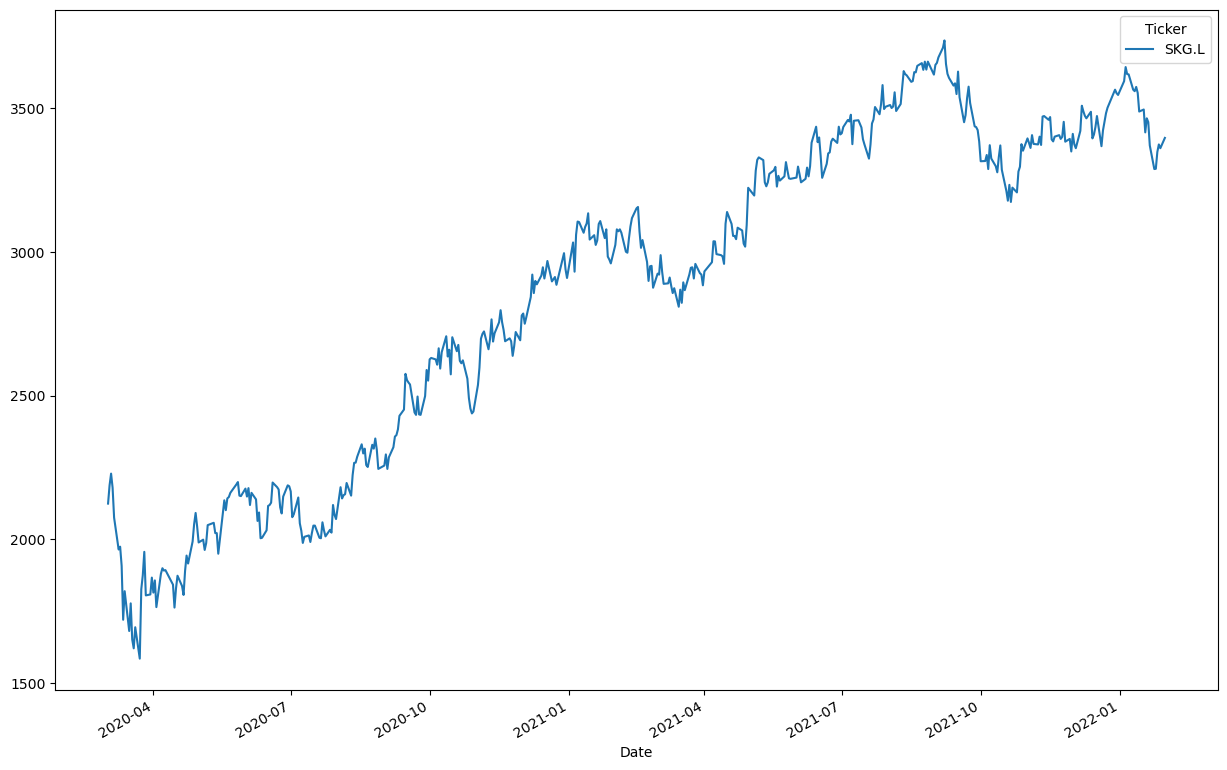

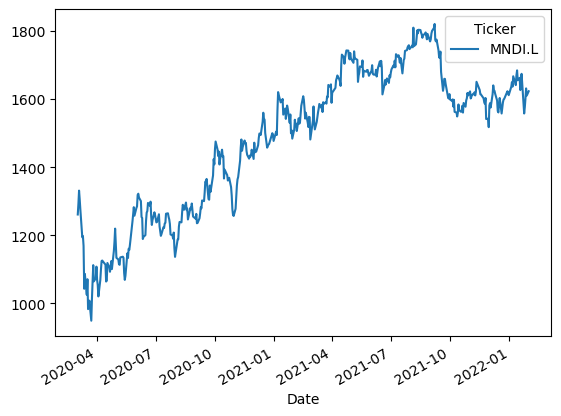

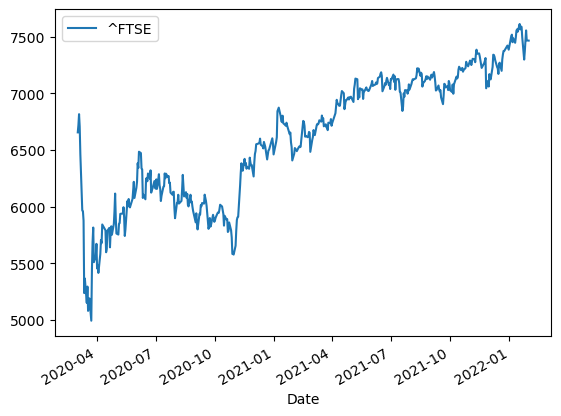

In [464]:
Smurfittr['Adj Close'].plot(figsize=(15,10), label='Smurfit')
Monditr['Adj Close'].plot(label='Mondi')
FTSEtr['Adj Close'].plot(label='FTSE')
plt.legend()
plt.show()

In [466]:
#define a modified FTSE
mFTSEtr=pd.DataFrame()
mFTSEtr['m Adj Close']=FTSEtr['Adj Close']/10

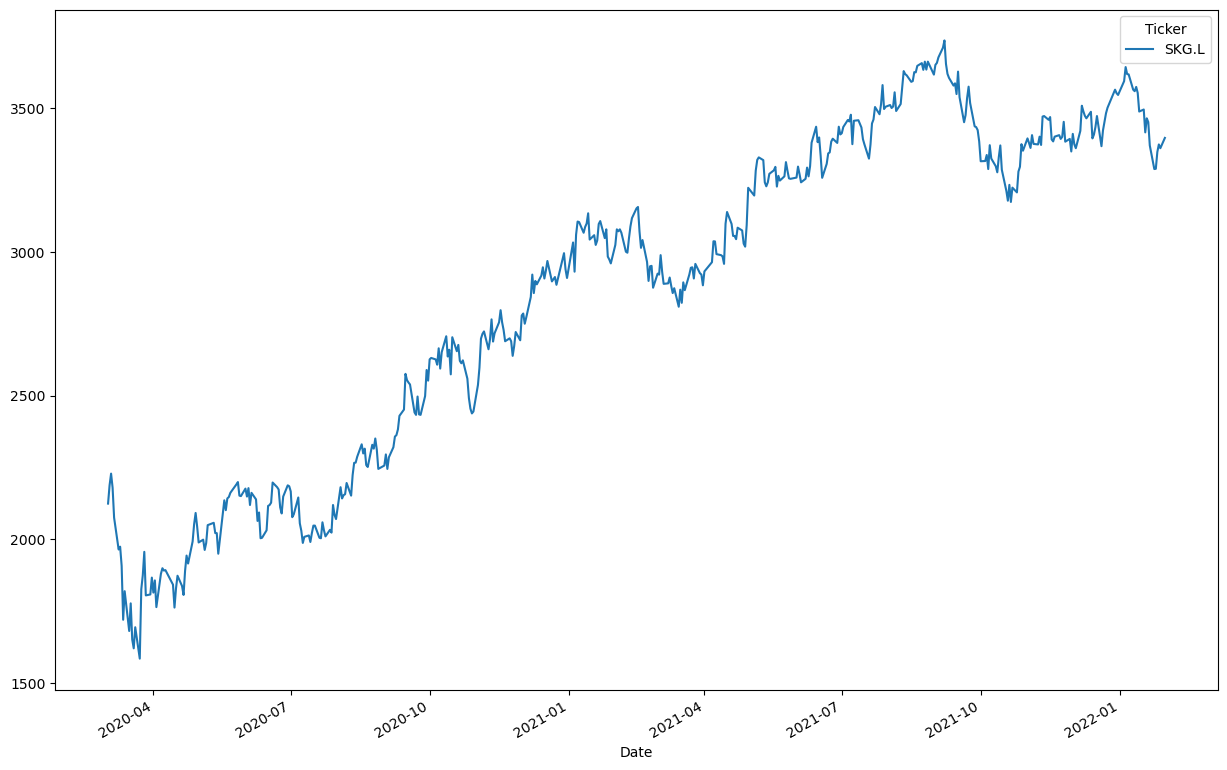

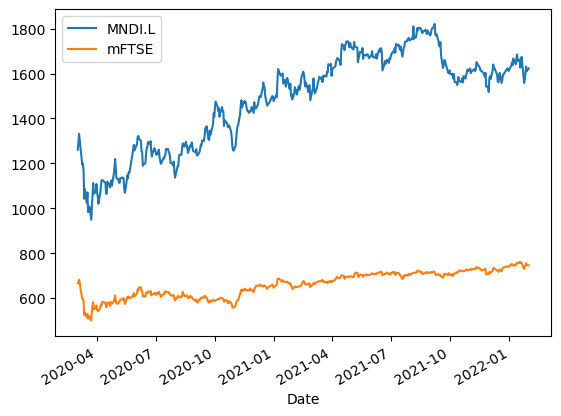

In [468]:
Smurfittr['Adj Close'].plot(figsize=(15,10), label='Smurfit')
Monditr['Adj Close'].plot(label='Mondi')
mFTSEtr['m Adj Close'].plot(label='mFTSE')
plt.legend()
plt.show()

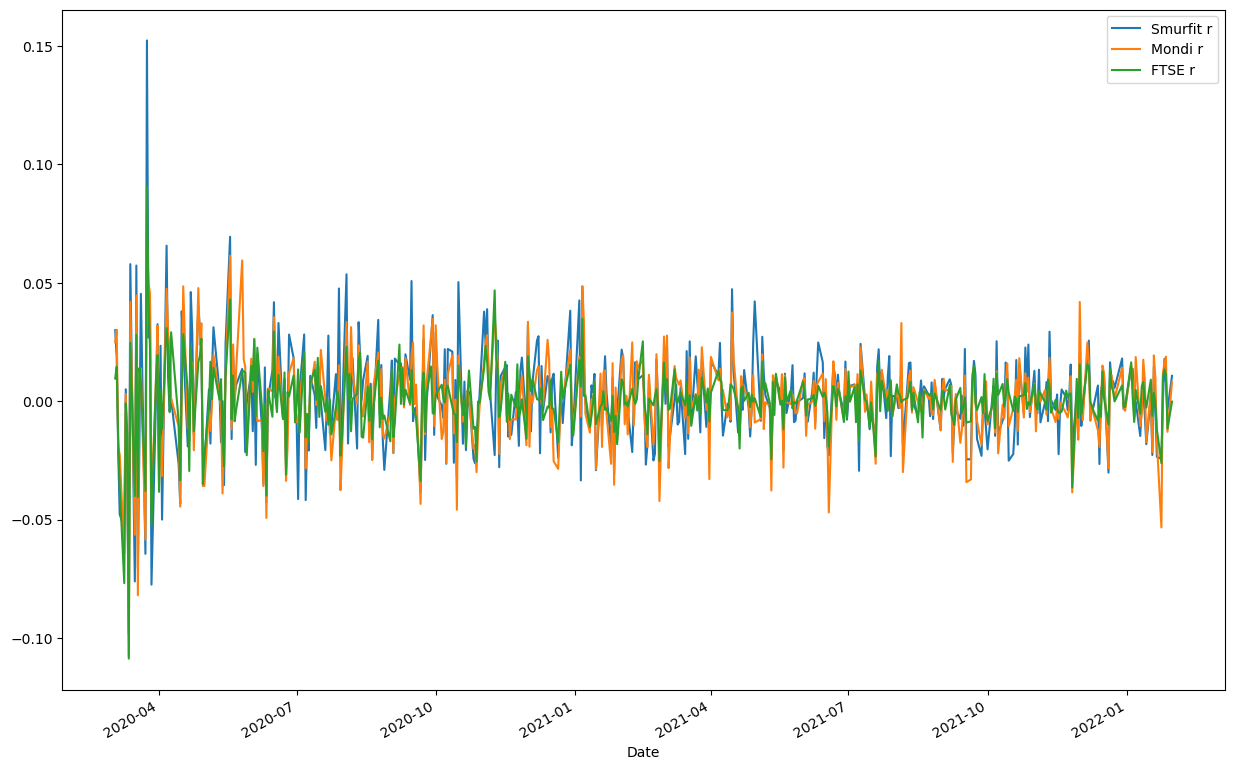

In [470]:
Smurfittr['Return'].plot(figsize=(15,10), label='Smurfit r')
Monditr['Return'].plot(label='Mondi r')
FTSEtr['Return'].plot(label='FTSE r')
plt.legend()
plt.show()

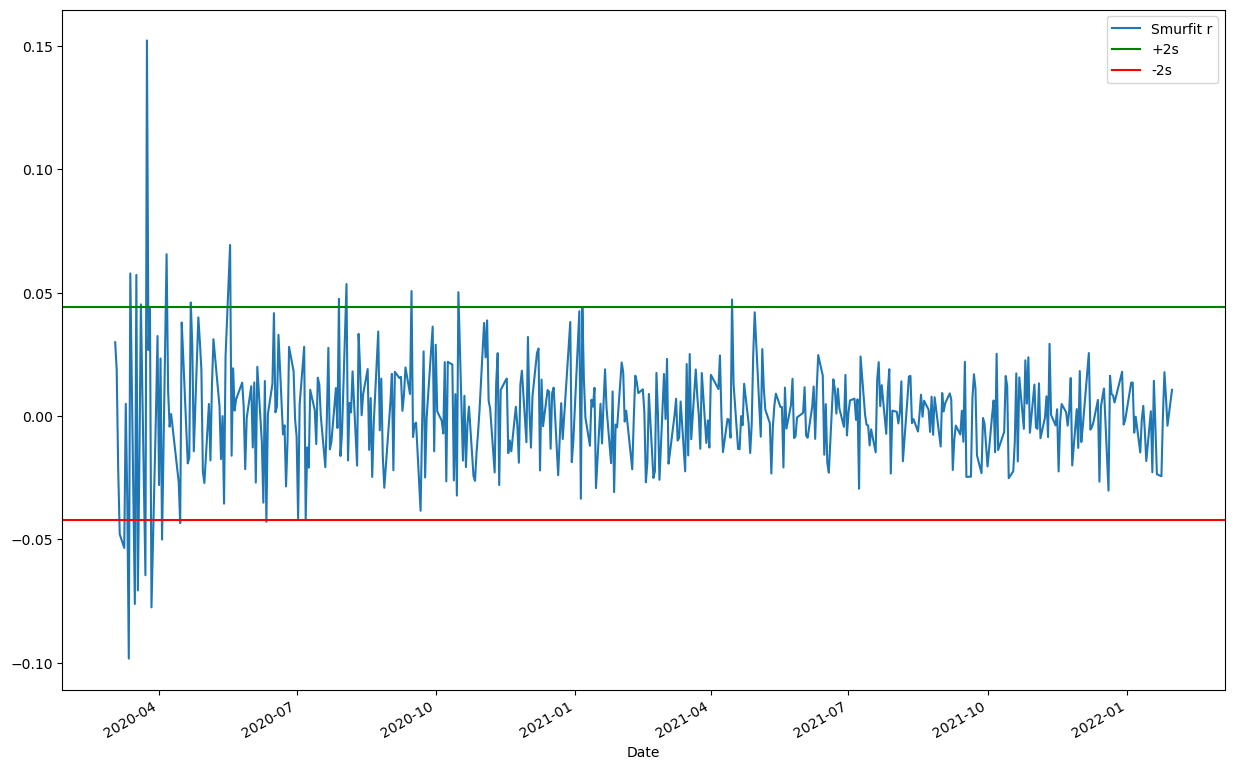

In [472]:
#Empirical Rules, Page 75 of Lecture 1
Smurfittr['Return'].plot(figsize=(15,10), label='Smurfit r')
plt.axhline(y=Smurfittr['Return'].mean()+2*Smurfittr['Return'].std(),label='+2s',color='g')
plt.axhline(y=Smurfittr['Return'].mean()-2*Smurfittr['Return'].std(),label='-2s',color='r')
plt.legend()
plt.show()

In [474]:
#select rows by value 
pss=Smurfittr['Return'].mean()+2*Smurfittr['Return'].std()
Smurfittr.loc[Smurfittr['Return']>=pss]

Price,Adj Close,Return
Ticker,SKG.L,
Date,,
2020-03-13 00:00:00+00:00,1819.018677,0.057820
2020-03-17 00:00:00+00:00,1776.640137,0.057226
2020-03-20 00:00:00+00:00,1693.512939,0.045272
2020-03-24 00:00:00+00:00,1825.538574,0.152263
2020-04-06 00:00:00+00:00,1879.326904,0.065619
2020-04-22 00:00:00+00:00,1889.106567,0.046029
2020-05-18 00:00:00+00:00,2135.228271,0.069388
2020-07-29 00:00:00+00:00,2118.928467,0.047542


In [476]:
nss=Smurfittr['Return'].mean()-2*Smurfittr['Return'].std()
Smurfittr.loc[Smurfittr['Return']<=nss]

Price,Adj Close,Return
Ticker,SKG.L,
Date,,
2020-03-06 00:00:00+00:00,2074.920166,-0.047868
2020-03-09 00:00:00+00:00,1964.083984,-0.053417
2020-03-12 00:00:00+00:00,1719.592041,-0.098291
2020-03-16 00:00:00+00:00,1680.473511,-0.076165
2020-03-18 00:00:00+00:00,1651.134521,-0.070642
2020-03-23 00:00:00+00:00,1584.306885,-0.064485
2020-03-27 00:00:00+00:00,1804.349243,-0.077500
2020-04-03 00:00:00+00:00,1763.600586,-0.050044


In [478]:
Smurfittr.loc[Smurfittr['Return']==Smurfittr['Return'].min()]

Price,Adj Close,Return
Ticker,SKG.L,
Date,,
2020-03-12 00:00:00+00:00,1719.592041,-0.098291


### Statistics

In [481]:
Smurfittr.describe()

Price,Adj Close,Return
Ticker,SKG.L,
count,484.000000,483.000000
mean,2857.453240,0.001203
std,576.389406,0.021566
min,1584.306885,-0.098291
25%,2286.105225,-0.010744
50%,2970.707642,0.001487
75%,3374.619934,0.013207
max,3735.619385,0.152263


In [483]:
Monditr.describe()

Price,Adj Close,Return
Ticker,MNDI.L,
count,484.000000,483.000000
mean,1482.333258,0.000712
std,212.235809,0.019373
min,948.894043,-0.107755
25%,1282.093689,-0.008395
50%,1554.574829,0.001172
75%,1649.515503,0.011611
max,1820.733154,0.067625


In [485]:
FTSEtr.describe()

Price,Adj Close,Return
Ticker,^FTSE,
count,484.000000,483.000000
mean,6605.004545,0.000340
std,572.234329,0.014275
min,4993.899902,-0.108738
25%,6104.700195,-0.004957
50%,6709.800049,0.000712
75%,7092.175171,0.006969
max,7611.200195,0.090530


What can you find by comparing the above tables?

In [488]:
# Return to risk
Smurfittr['Return'].mean()/Monditr['Return'].std()

0.062118412521118736

### Boxplot

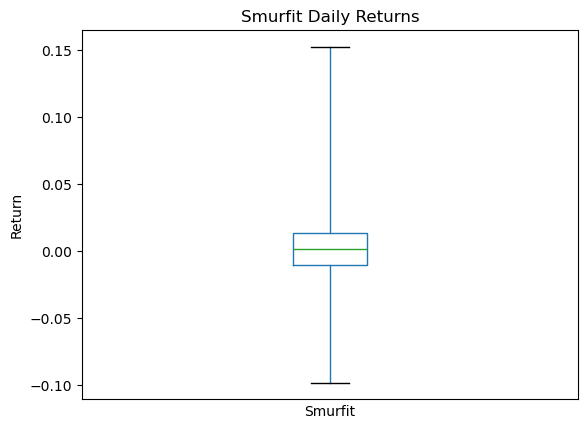

In [491]:
lgb=Smurfittr.boxplot(column='Return',whis=[0,100],grid=False)

lgb.set_title("Smurfit Daily Returns",fontsize=12)
lgb.set_xlabel('Smurfit', fontsize=10)
lgb.set_ylabel('Return', fontsize=10)
lgb.set_xticks([])
plt.show()

In [493]:
#Creturns=pd.concat([Smurfittr['Return'],Monditr['Return'],FTSEtr['Return']],axis=1)
#Creturns.columns=['smurfit','Mondi','FTSE']

In [495]:
AllTrainingReturns=pd.DataFrame({'Smurfit r':Smurfittr['Return'],'Mondi r':Monditr['Return'],'FTSE r':FTSEtr['Return']})

In [497]:
AllTrainingReturns

,Smurfit r,Mondi r,FTSE r
Date,,,
2020-03-02 00:00:00+00:00,NaN,NaN,NaN
2020-03-03 00:00:00+00:00,0.029931,0.024809,0.009512
2020-03-04 00:00:00+00:00,0.018629,0.030105,0.014498
2020-03-05 00:00:00+00:00,-0.021946,-0.018982,-0.016169
2020-03-06 00:00:00+00:00,-0.047868,-0.022727,-0.036210
...,...,...,...
2022-01-25 00:00:00+00:00,0.000266,0.011898,0.010182
2022-01-26 00:00:00+00:00,0.017805,0.015957,0.013335
2022-01-27 00:00:00+00:00,0.007833,0.018738,0.011312


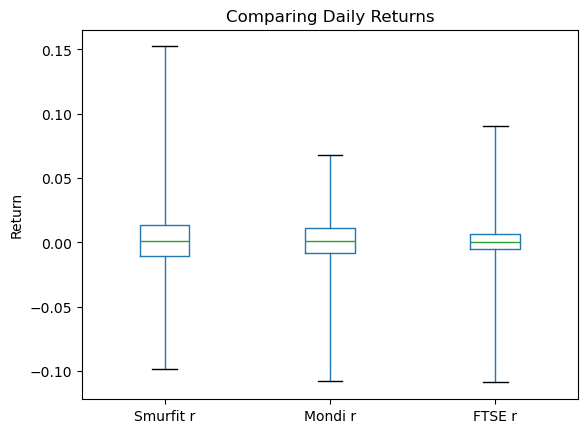

In [499]:
AllTrainingReturns.boxplot(whis=[0,100],grid=False)
plt.title('Comparing Daily Returns')
plt.ylabel('Return')
plt.show()

### Histogram

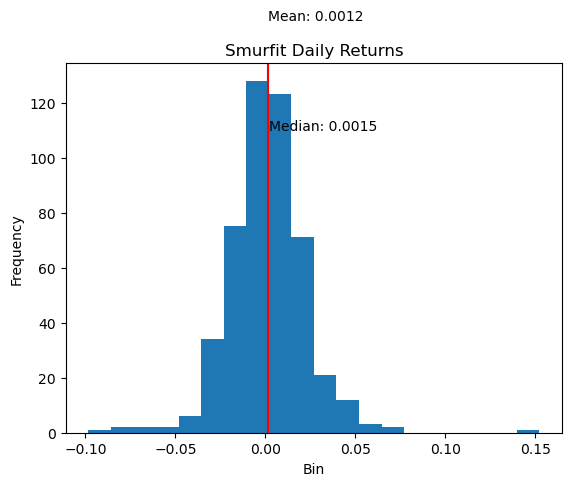

In [502]:
Smurfittr.hist(column='Return',bins=20,grid=False)

plt.title("Smurfit Daily Returns",fontsize=12)
plt.xlabel('Bin', fontsize=10)
plt.ylabel('Frequency', fontsize=10)

plt.axvline(Smurfittr['Return'].mean())
plt.text(Smurfittr['Return'].mean()*1.1,150,'Mean: {:,.4f}'.format(Smurfittr['Return'].mean()))

plt.axvline(Smurfittr['Return'].median(),color='r')
plt.text(Smurfittr['Return'].median()*1.2,110,'Median: {:,.4f}'.format(Smurfittr['Return'].median()))

plt.show()

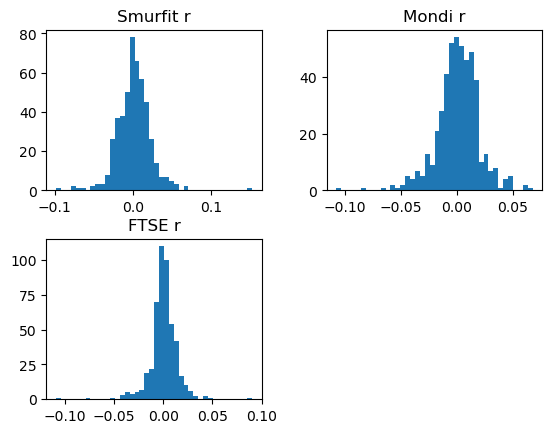

In [504]:
# it's better to draw histograms individually by the above codes

AllTrainingReturns.hist(bins=40,grid=False)
plt.show()

## Regression

In [507]:
# The three dataframes have the same column names, we should change the names and merge them together
Smurfittr.columns=['Smurfit_Price','Smurfit_Return']
Monditr.columns=['Mondi_Price','Mondi_Return']
FTSEtr.columns=['FTSE_Price','FTSE_Return']
#concatenate them by columns
OverallTraining=pd.concat([Smurfittr,Monditr,FTSEtr],axis=1)

In [509]:
OverallTraining.head()

,Smurfit_Price,Smurfit_Return,Mondi_Price,Mondi_Return,FTSE_Price,FTSE_Return
Date,,,,,,
2020-03-02 00:00:00+00:00,2123.818604,NaN,1260.914307,NaN,6654.899902,NaN
2020-03-03 00:00:00+00:00,2187.386719,0.029931,1292.196655,0.024809,6718.200195,0.009512
2020-03-04 00:00:00+00:00,2228.135254,0.018629,1331.098877,0.030105,6815.600098,0.014498
2020-03-05 00:00:00+00:00,2179.236572,-0.021946,1305.832397,-0.018982,6705.399902,-0.016169
2020-03-06 00:00:00+00:00,2074.920166,-0.047868,1276.154419,-0.022727,6462.600098,-0.036210


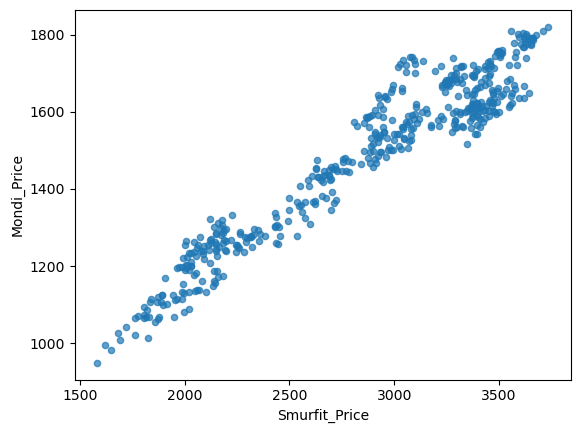

In [511]:
OverallTraining.plot.scatter(x='Smurfit_Price',y='Mondi_Price',alpha=0.7)
plt.show()

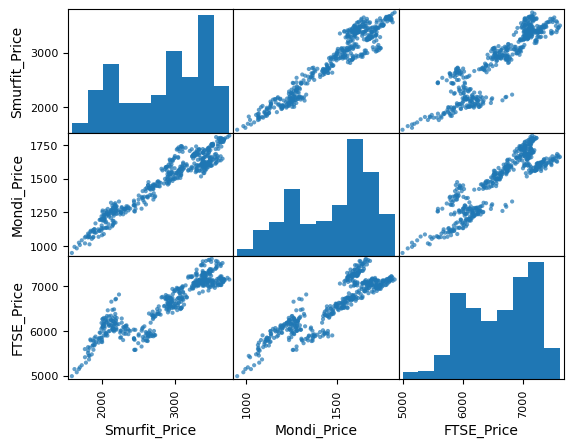

In [513]:
pd.plotting.scatter_matrix(OverallTraining.iloc[:,[0,2,4]], alpha=0.7)
plt.show()

In [515]:
OverallTraining.iloc[:,[0,2,4]].corr(method='pearson')

,Smurfit_Price,Mondi_Price,FTSE_Price
Smurfit_Price,1.000000,0.959303,0.909063
Mondi_Price,0.959303,1.000000,0.890152
FTSE_Price,0.909063,0.890152,1.000000


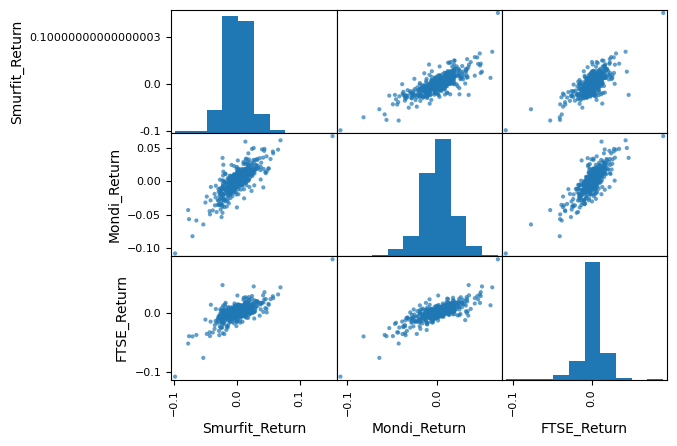

In [517]:
pd.plotting.scatter_matrix(OverallTraining.iloc[:,[1,3,5]], alpha=0.7)
plt.show()

In [518]:
OverallTraining.iloc[:,[1,3,5]].corr(method='pearson')

,Smurfit_Return,Mondi_Return,FTSE_Return
Smurfit_Return,1.000000,0.796607,0.722743
Mondi_Return,0.796607,1.000000,0.800594
FTSE_Return,0.722743,0.800594,1.000000


In [521]:
Smurfit_Mondi_reg=sfa.ols('Smurfit_Price ~ Mondi_Price', data=OverallTraining).fit()

In [523]:
Smurfit_Mondi_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Smurfit_Price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     5563.
Date:                Sun, 10 Nov 2024   Prob (F-statistic):          7.57e-267
Time:                        16:53:23   Log-Likelihood:                -3150.9
No. Observations:                 484   AIC:                             6306.
Df Residuals:                     482   BIC:                             6314.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1004.4286     52.306    -19.203      0.000   -1107.204    -901.653
Mondi_Price     2.6053      0.035     74.584      0.000       2.537       2.674
==============================================================================
Omnibus:                        1.401   Durbin-Watson:                   0.069
Prob(Omnibus):                  0.496   Jarque-Bera (JB):                1.210
Skew:                          -0.109   Prob(JB):                        0.546
Kurtosis:                       3.111   Cond. No.                     1.06e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

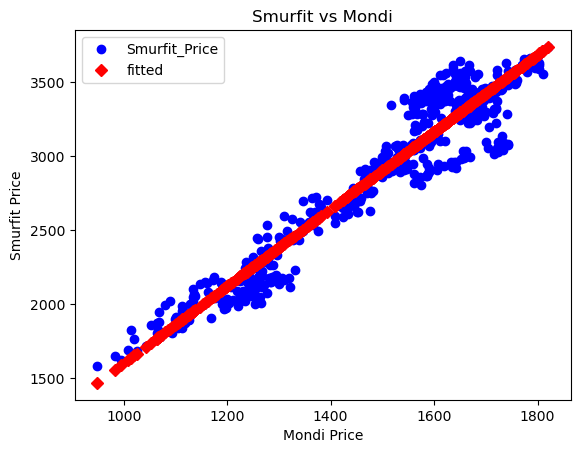

In [525]:
sa.graphics.plot_fit(Smurfit_Mondi_reg,exog_idx='Mondi_Price',vlines=False)
plt.ylabel("Smurfit Price")
plt.xlabel("Mondi Price")
plt.title("Smurfit vs Mondi")
plt.show()

In [527]:
Smurfit_FTSE_rreg=sfa.ols('Smurfit_Return ~ FTSE_Return', data=OverallTraining).fit()

In [529]:
Smurfit_FTSE_rreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Smurfit_Return   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     526.0
Date:                Sun, 10 Nov 2024   Prob (F-statistic):           3.35e-79
Time:                        16:53:24   Log-Likelihood:                 1346.7
No. Observations:                 483   AIC:                            -2689.
Df Residuals:                     481   BIC:                            -2681.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0008      0.001      1.225      0.221      -0.001       0.002
FTSE_Return     1.0919      0.048     22.935      0.000       0.998       1.185
==============================================================================
Omnibus:                       23.995   Durbin-Watson:                   2.358
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.156
Skew:                          -0.189   Prob(JB):                     1.43e-13
Kurtosis:                       4.672   Cond. No.                         70.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

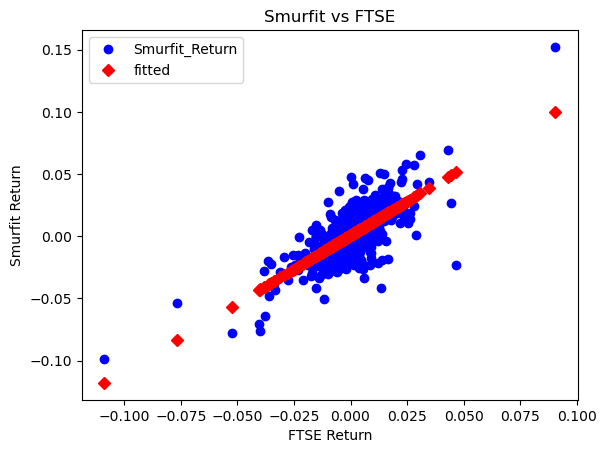

In [531]:
sa.graphics.plot_fit(Smurfit_FTSE_rreg,exog_idx='FTSE_Return',vlines=False)
plt.ylabel("Smurfit Return")
plt.xlabel("FTSE Return")
plt.title("Smurfit vs FTSE")
plt.show()

In [533]:
# Multiple Regression
Smurfit_Mondi_FTSE_reg=sfa.ols('Smurfit_Price ~ Mondi_Price + FTSE_Price', data=OverallTraining).fit()

In [535]:
Smurfit_Mondi_FTSE_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Smurfit_Price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     3454.
Date:                Sun, 10 Nov 2024   Prob (F-statistic):          4.56e-286
Time:                        16:53:25   Log-Likelihood:                -3101.8
No. Observations:                 484   AIC:                             6210.
Df Residuals:                     481   BIC:                             6222.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1819.5558     91.538    -19.878      0.000   -1999.419   -1639.693
Mondi_Price     1.9633      0.069     28.316      0.000       1.827       2.100
FTSE_Price      0.2675      0.026     10.402      0.000       0.217       0.318
==============================================================================
Omnibus:                       21.007   Durbin-Watson:                   0.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.905
Skew:                          -0.533   Prob(JB):                     1.06e-05
Kurtosis:                       3.021   Cond. No.                     9.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Time Series

In [538]:
Smurfitte.columns=['Smurfit_Price','Smurfit_Return']
Mondite.columns=['Mondi_Price','Mondi_Return']
FTSEte.columns=['FTSE_Price','FTSE_Return']

### Moving Average

In [541]:
ma5=Smurfittr.rolling(5).mean()

In [543]:
ma20=Smurfittr.rolling(20).mean()

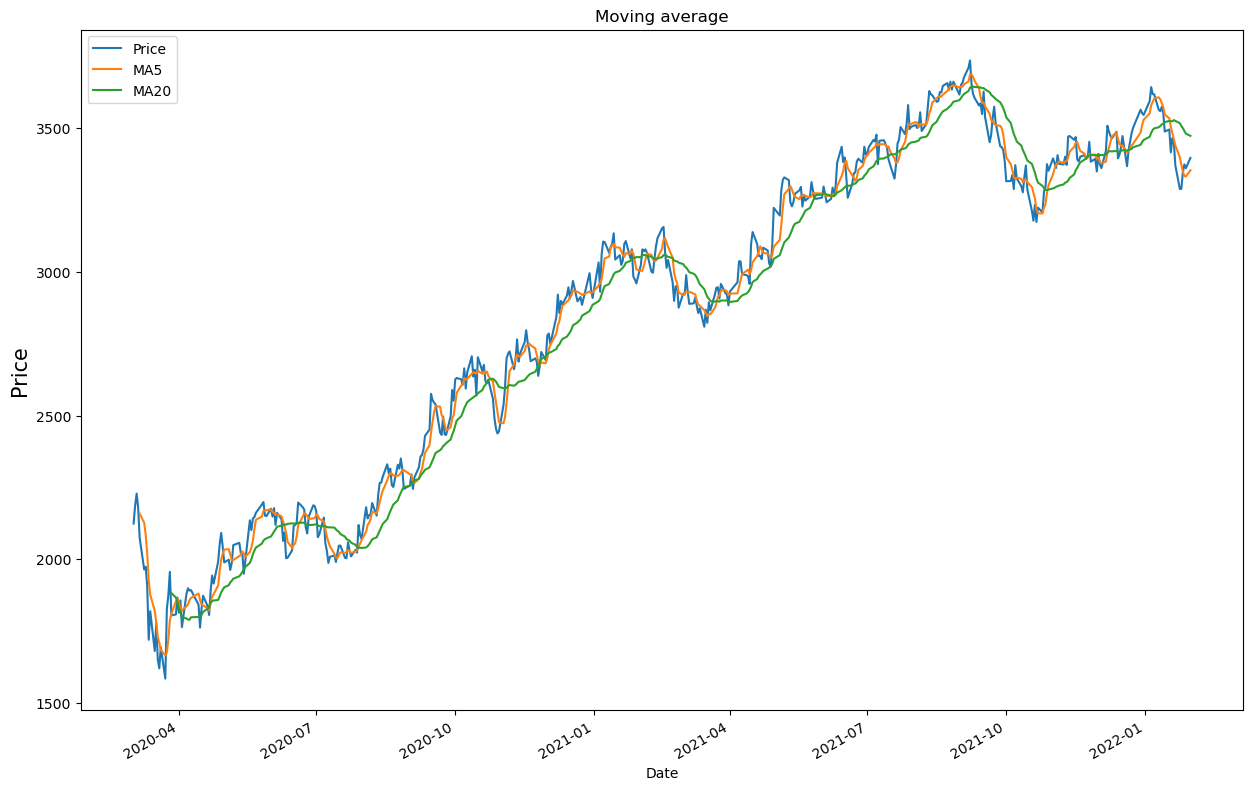

In [545]:
Smurfittr['Smurfit_Price'].plot(figsize=(15,10), title= 'Moving average', label='Price')
ma5['Smurfit_Price'].plot(label='MA5')
ma20['Smurfit_Price'].plot(label='MA20')
plt.legend()
plt.ylabel('Price',fontsize=15)
plt.show()

In [547]:
#creat forecasts
Smurfitma5fcsts=pd.Series([ma5['Smurfit_Price'][-1]]*20)
Smurfitma5fcsts.index=Smurfitte.index

/var/folders/rs/2rph9dbx1sd2d_5976d3npn00000gn/T/ipykernel_99906/2639397050.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Smurfitma5fcsts=pd.Series([ma5['Smurfit_Price'][-1]]*20)


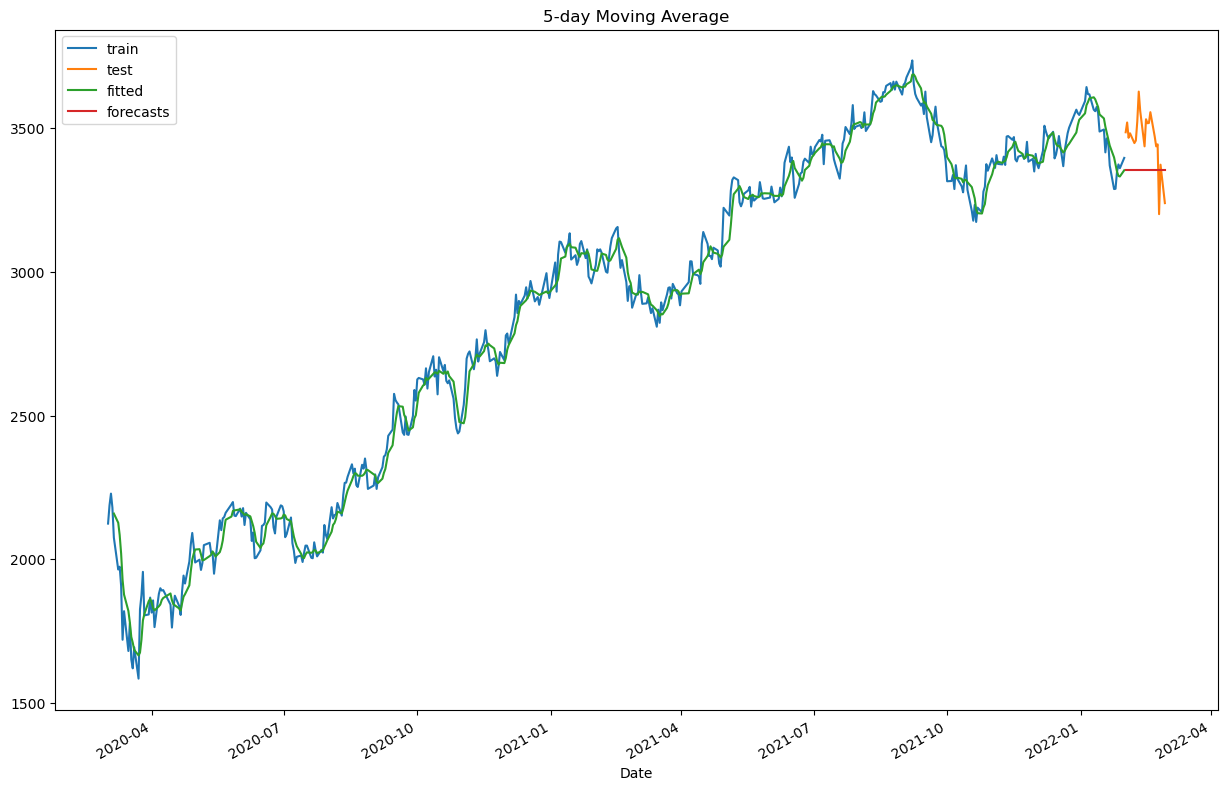

In [549]:
Smurfittr['Smurfit_Price'].plot(figsize=(15,10),label='train',title='5-day Moving Average')
Smurfitte['Smurfit_Price'].plot(label='test')
ma5['Smurfit_Price'].plot(label='fitted')
Smurfitma5fcsts.plot(label='forecasts')
plt.legend()
plt.show()

In [551]:
MAE(Smurfitte['Smurfit_Price'],Smurfitma5fcsts)

137.84261962890633

In [553]:
MSE(Smurfitte['Smurfit_Price'],Smurfitma5fcsts)

21970.881965728426

In [555]:
print(
    'MAE: {:,.4f}'.format(MAE(Smurfitte['Smurfit_Price'],Smurfitma5fcsts)),
    '\nMSE: {:,.4f}'.format(MSE(Smurfitte['Smurfit_Price'],Smurfitma5fcsts))
                         )

MAE: 137.8426 
MSE: 21,970.8820


### Single Exponential Smoothing

In [558]:
Smurfitses=SES(Smurfittr['Smurfit_Price'],initialization_method="estimated").fit()

/Applications/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [617]:
Smurfitsesfcsts=Smurfitses.forecast(20)
Smurfitsesfcsts.index=Smurfitte.index

/Applications/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Applications/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


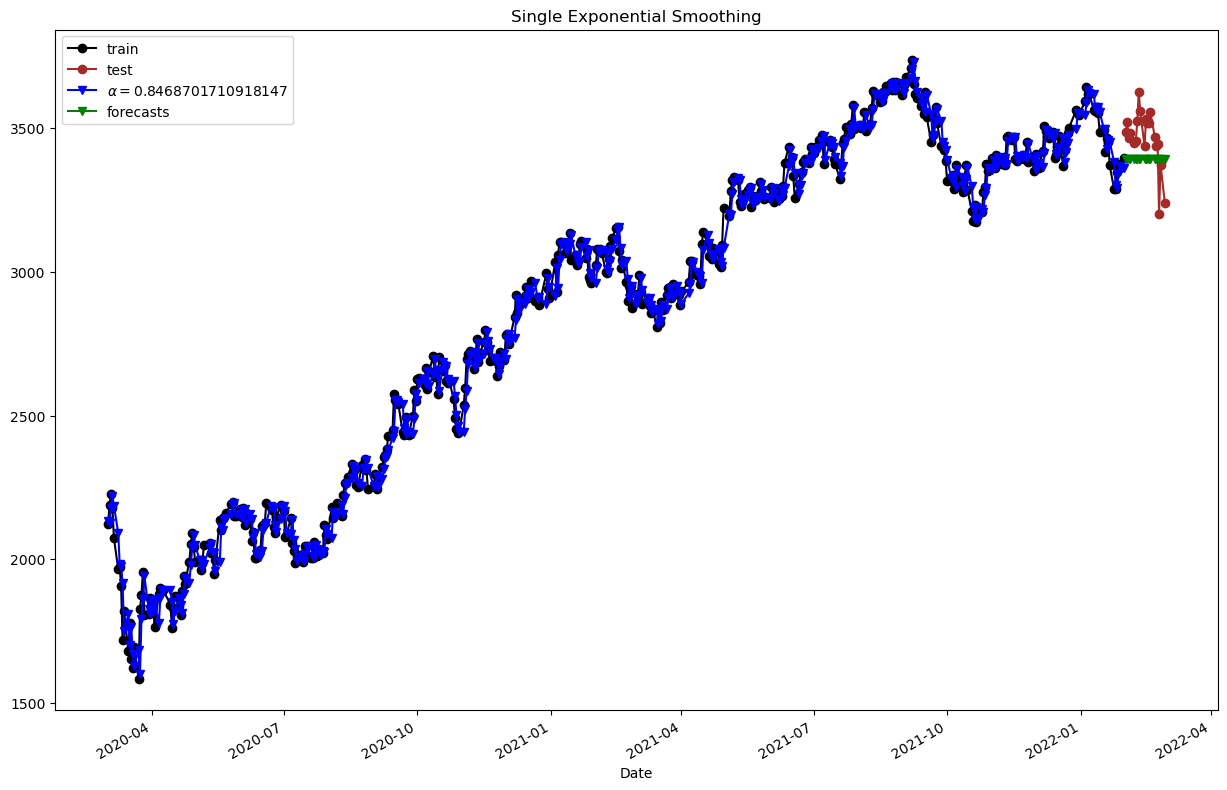

In [619]:
Smurfittr['Smurfit_Price'].plot(figsize=(15,10),marker='o',color='black',label='train',title='Single Exponential Smoothing')
Smurfitte['Smurfit_Price'].plot(marker='o',color='brown',label='test')
Smurfitses.fittedvalues.plot(marker='v', color='blue',label=r'$\alpha=%s$'%Smurfitses.model.params['smoothing_level'])
Smurfitsesfcsts.plot(marker='v', color='green',label='forecasts')
plt.legend()
plt.show()

In [621]:
print(
    'MAE: {:,.4f}'.format(MAE(Smurfitte['Smurfit_Price'],Smurfitsesfcsts)),
    '\nMSE: {:,.4f}'.format(MSE(Smurfitte['Smurfit_Price'],Smurfitsesfcsts))
)

MAE: 109.5145 
MSE: 15,013.2537


### Double Exponential Smoothing

In [624]:
Smurfitdes=DES(Smurfittr['Smurfit_Price'],initialization_method="estimated").fit()

/Applications/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [626]:
Smurfitdesfcsts=Smurfitdes.forecast(20)
Smurfitdesfcsts.index=Smurfitte.index

/Applications/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Applications/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


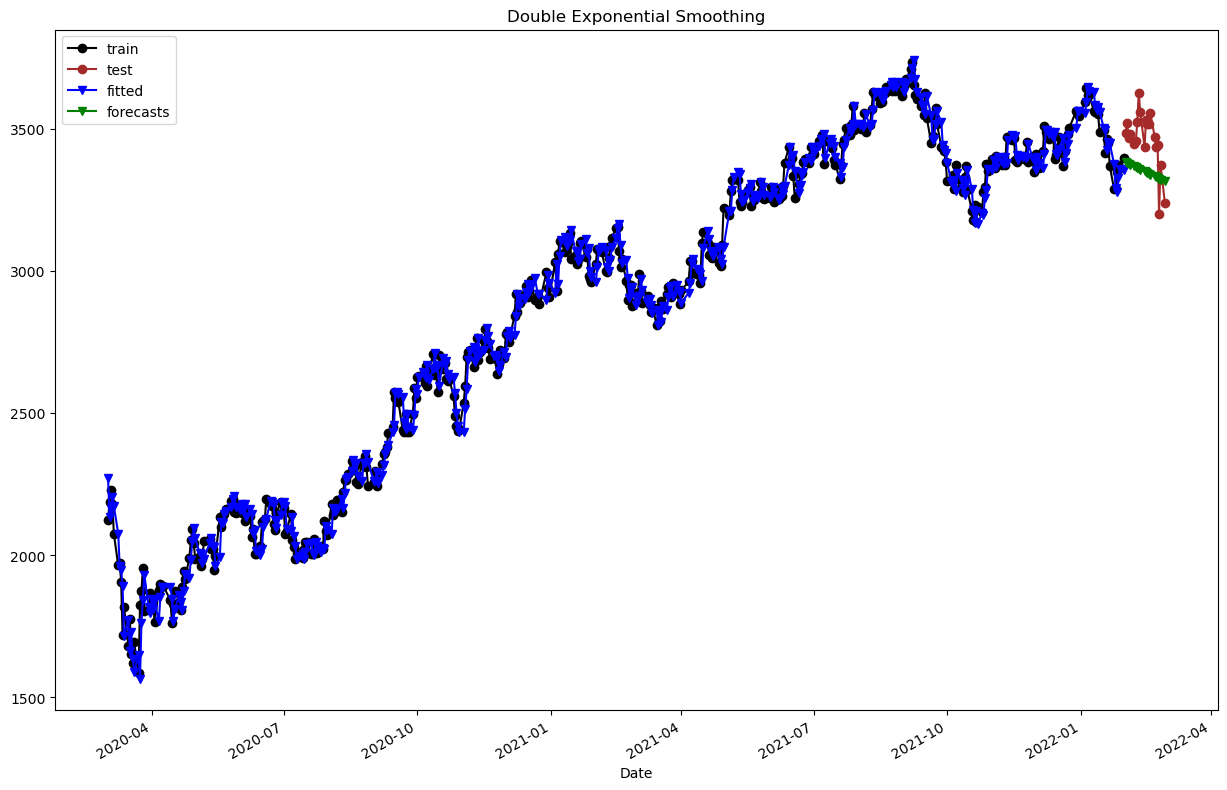

In [628]:
Smurfittr['Smurfit_Price'].plot(figsize=(15,10),marker='o',color='black',label='train',title='Double Exponential Smoothing')
Smurfitte['Smurfit_Price'].plot(marker='o',color='brown',label='test')
Smurfitdes.fittedvalues.plot(marker='v', color='blue',label='fitted')
Smurfitdesfcsts.plot(marker='v', color='green',label='forecasts')
plt.legend()
plt.show()

In [630]:
print(
    'MAE: {:,.4f}'.format(MAE(Smurfitte['Smurfit_Price'],Smurfitdesfcsts)),
    '\nMSE: {:,.4f}'.format(MSE(Smurfitte['Smurfit_Price'],Smurfitdesfcsts))
)

MAE: 134.3452 
MSE: 20,987.1329


### Holt's Winters (Additive)

In [633]:
Smurfittesa=TES(Smurfittr['Smurfit_Price'],seasonal_periods=4, trend='add', seasonal='add', use_boxcox=True, initialization_method="estimated").fit()
Smurfittesfcstsa=Smurfittesa.forecast(20)
Smurfittesfcstsa.index=Smurfitte.index

/Applications/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Applications/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Applications/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


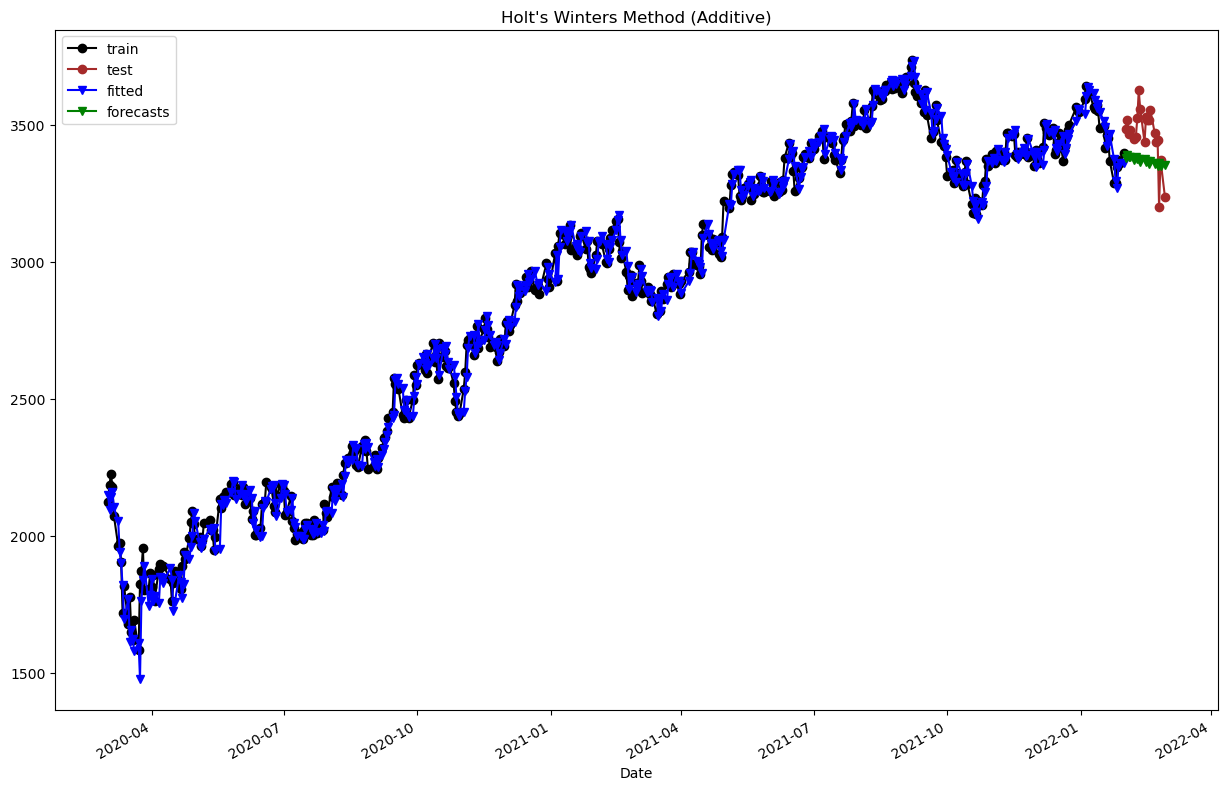

In [635]:
Smurfittr['Smurfit_Price'].plot(figsize=(15,10),marker='o',color='black',label='train',title="Holt's Winters Method (Additive)")
Smurfitte['Smurfit_Price'].plot(marker='o',color='brown',label='test')
Smurfittesa.fittedvalues.plot(marker='v', color='blue',label='fitted')
Smurfittesfcstsa.plot(marker='v', color='green',label='forecasts')
plt.legend()
plt.show()

In [648]:
print(
    'MAE: {:,.4f}'.format(MAE(Smurfitte['Smurfit_Price'],Smurfittesfcstsa)),
    '\nMSE: {:,.4f}'.format(MSE(Smurfitte['Smurfit_Price'],Smurfittesfcstsa))
)

MAE: 123.2476 
MSE: 17,997.1821


### Holt's Winters (Multiplicative)

In [651]:
Smurfittesm=TES(Smurfittr['Smurfit_Price'],seasonal_periods=4, trend='add', seasonal='mul', use_boxcox=True, initialization_method="estimated").fit()
Smurfittesfcstsm=Smurfittesm.forecast(20)
Smurfittesfcstsm.index=Smurfitte.index

/Applications/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Applications/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Applications/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


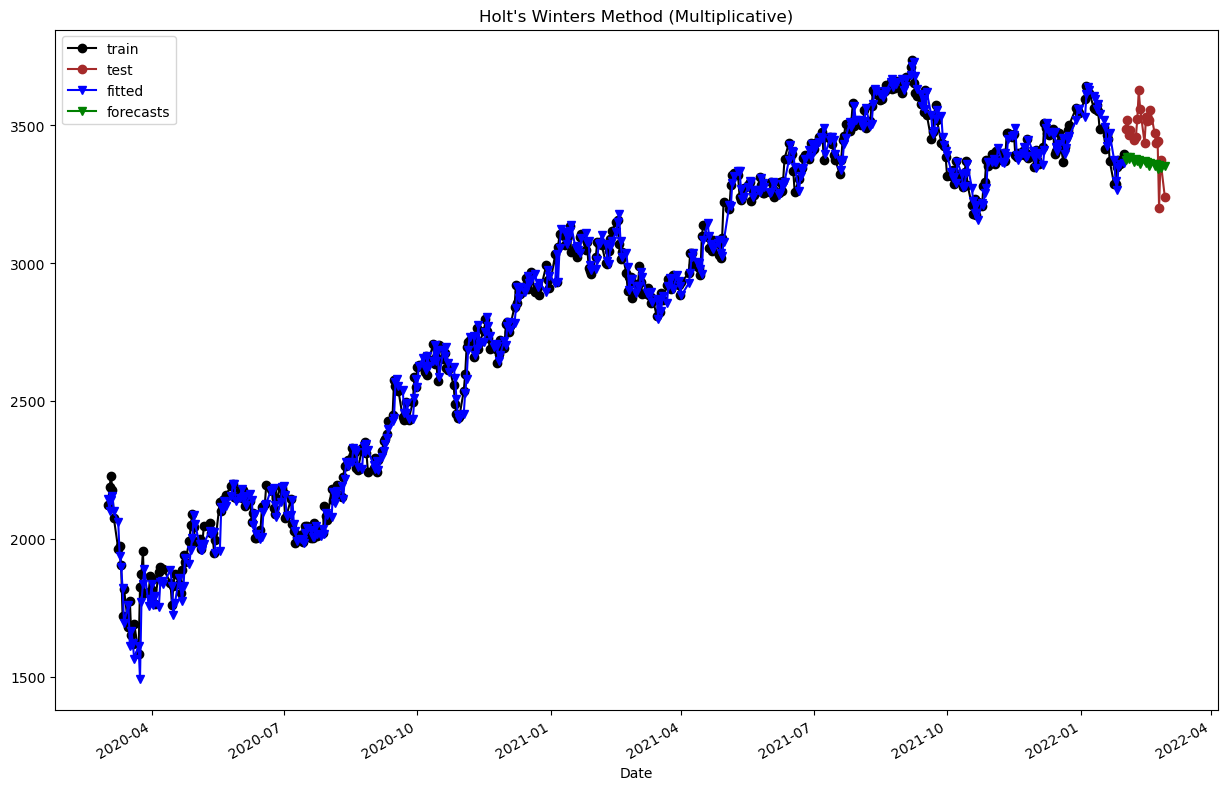

In [653]:
Smurfittr['Smurfit_Price'].plot(figsize=(15,10),marker='o',color='black',label='train',title="Holt's Winters Method (Multiplicative)")
Smurfitte['Smurfit_Price'].plot(marker='o',color='brown',label='test')
Smurfittesm.fittedvalues.plot(marker='v', color='blue',label='fitted')
Smurfittesfcstsm.plot(marker='v', color='green',label='forecasts')
plt.legend()
plt.show()

In [655]:
print(
    'MAE: {:,.4f}'.format(MAE(Smurfitte['Smurfit_Price'],Smurfittesfcstsm)),
    '\nMSE: {:,.4f}'.format(MSE(Smurfitte['Smurfit_Price'],Smurfittesfcstsm))
)

MAE: 126.1160 
MSE: 18,659.6794
